## Using Apriori Algorithm

<img src="https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fblogs-images.forbes.com%2Fmarciaturner%2Ffiles%2F2018%2F01%2FWegmans-Produce-1.jpg" width="800px">

Frequent Itemsets via Apriori Algorithm

Apriori function to extract frequent itemsets for association rule mining

We have a dataset of a mall with 7500 transactions of different customers buying different items from the store.
We need to find correlations between the different items in the store. so that we can know the next item the customer would be interested in buying from the store if they are buying apples, bananas, and mangos. 

## Overview
Apriori is a popular algorithm for extracting frequent itemsets with applications in association rule learning. The apriori algorithm has been designed to operate on databases containing transactions, such as purchases by customers of a store. An itemset is considered as "frequent" if it meets a user-specified support threshold. For instance, if the support threshold is set to 0.5 (50%), a frequent itemset is defined as a set of items that occur together in at least 50% of all transactions in the database.

**Importing libraries**

In [73]:
# conda install -c conda-forge squarify
# conda install -c conda-forge mlxtend

In [74]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# for defining path
import os
# print(os.listdir('../input/'))

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


**Importing the dataset**

In [75]:
# reading the dataset

data = pd.read_csv('store_transaction.csv', header = None)

# let's check the shape of the dataset
data.shape

(7501, 20)

In [76]:
import pandas

In [77]:
# checking the head of the data

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# checkng the tail of the data

data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# checking the random entries in the data

data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
6850,herb & pepper,mineral water,eggs,cake,cereals,brownies,pancakes,tomato juice,low fat yogurt,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1540,frozen vegetables,tomatoes,mineral water,soup,milk,vegetables mix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3697,pasta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6216,mineral water,milk,vegetables mix,brownies,fresh bread,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4441,tomatoes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5655,pancakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2066,frozen vegetables,chocolate,whole wheat rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2877,tomatoes,ground beef,spaghetti,avocado,pancakes,cooking oil,cereals,french fries,toothpaste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1794,cake,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6818,ground beef,mineral water,soup,milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# let's describe the dataset

data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


## Data Visualizations

In [81]:
all_elements = data.values.tolist()
flat_list = [item for sublist in all_elements for item in sublist]
cleanedList = [x for x in flat_list if str(x) != 'nan']
temp_df = pd.DataFrame({'col':cleanedList})

In [82]:
len(set(cleanedList))

120

C:\Anaconda\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


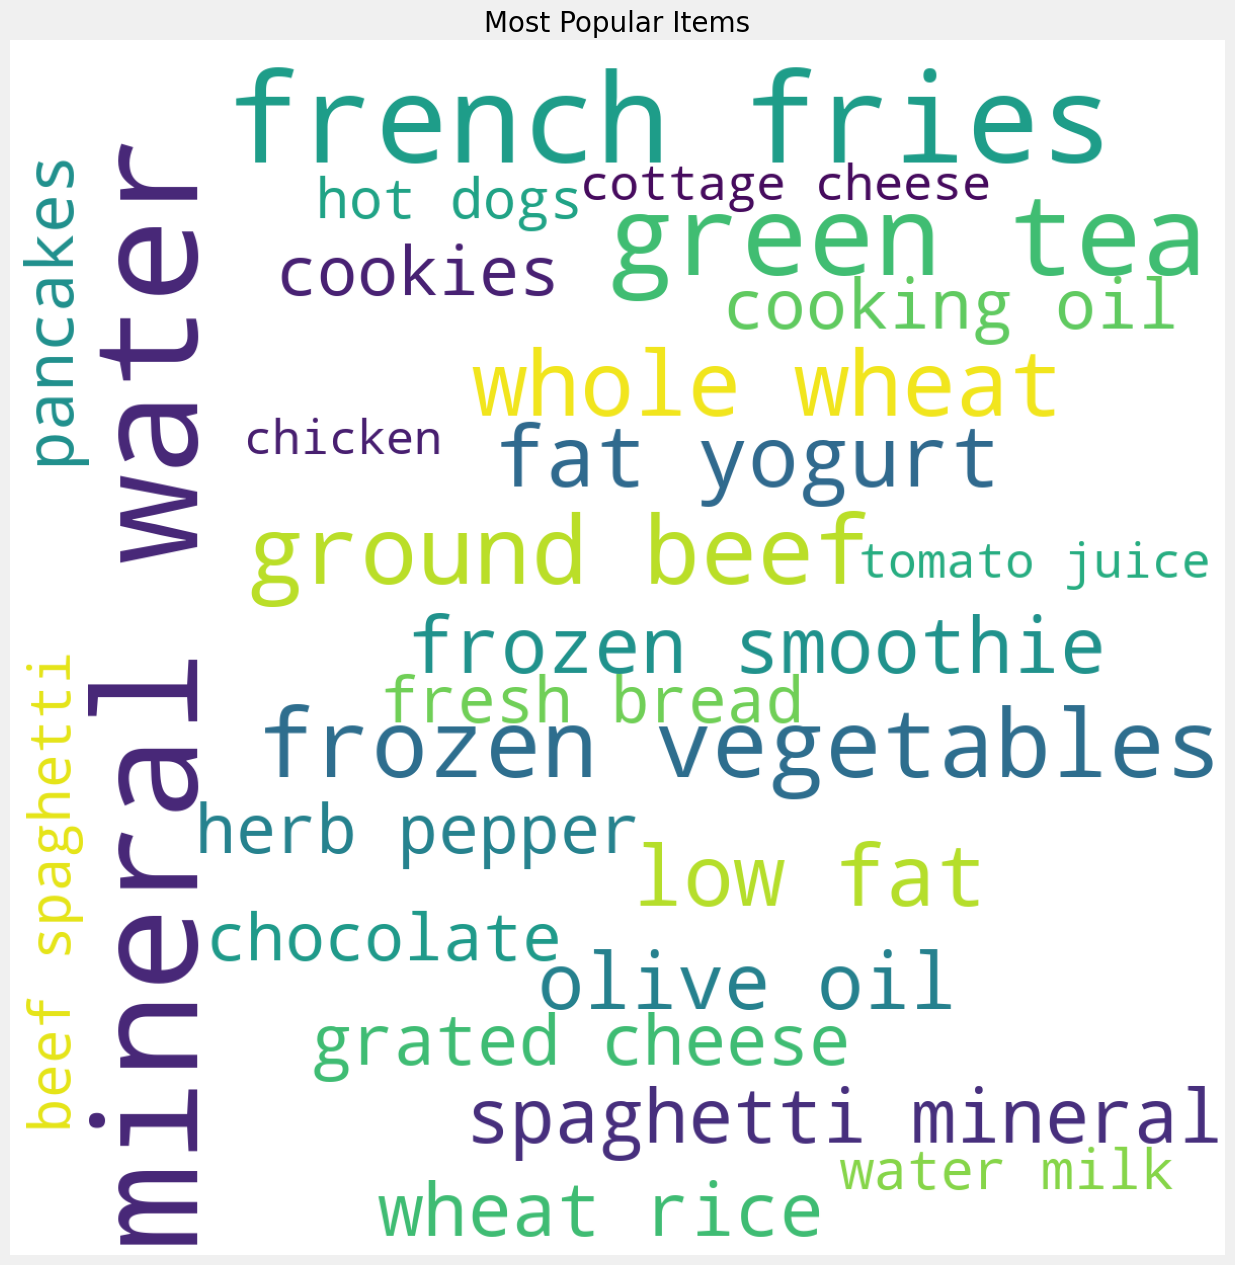

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 25, regexp = r"\w[\w]+").generate(str(cleanedList))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()


C:\Anaconda\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


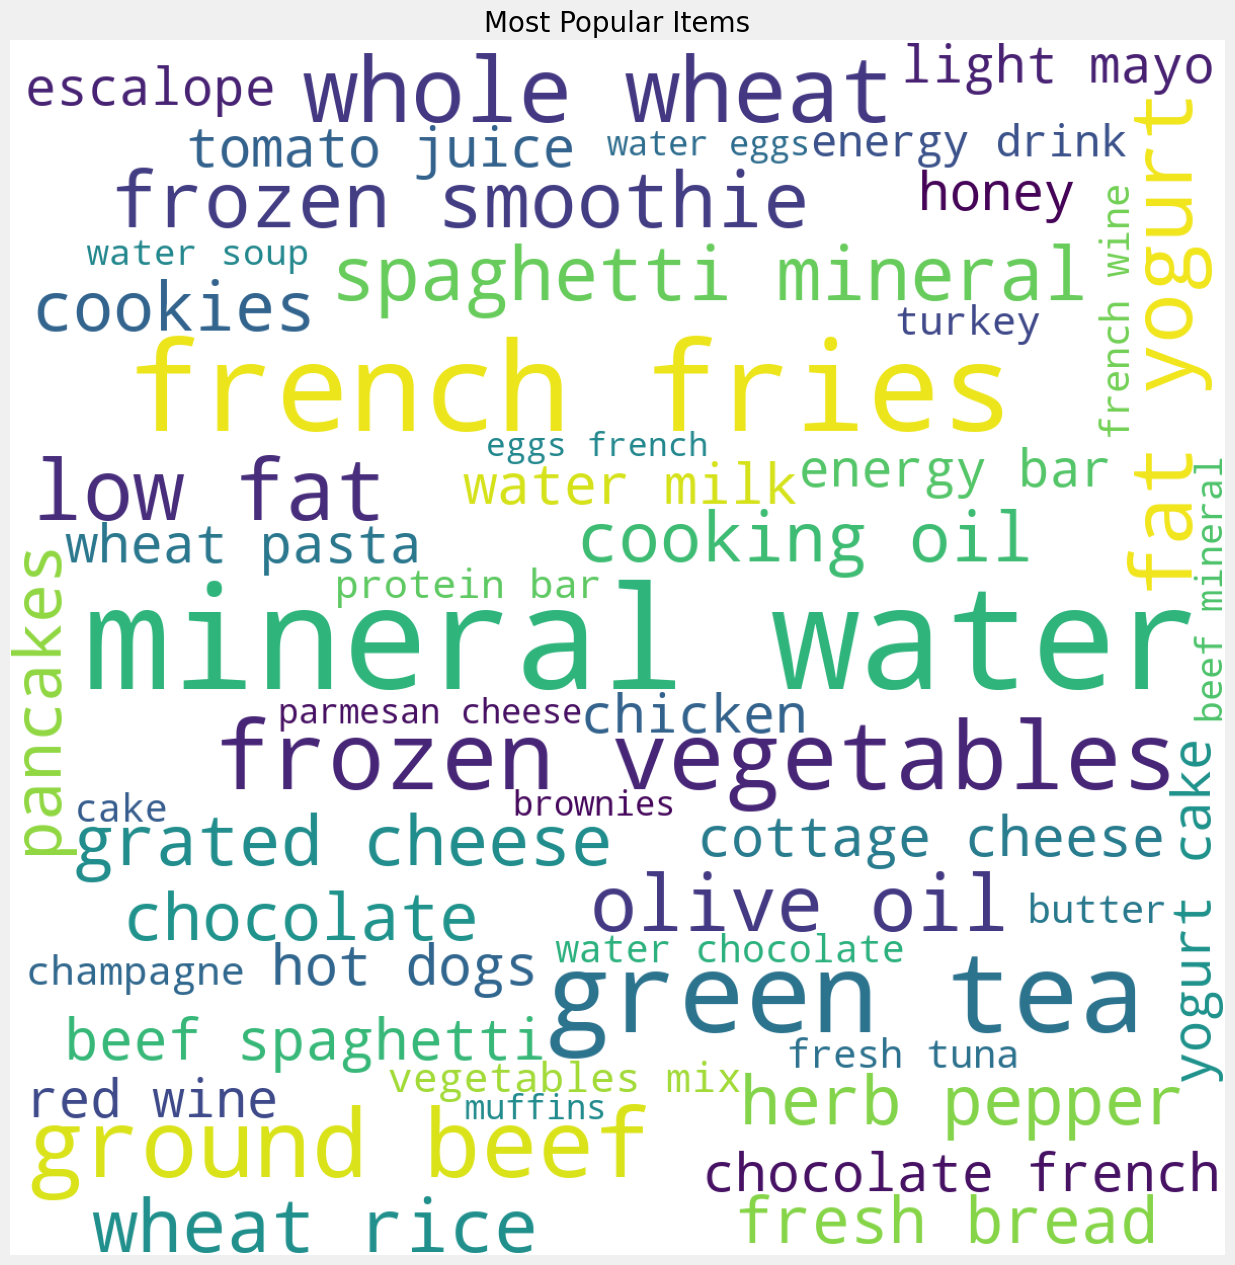

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 50, regexp = r"\w[\w]+").generate(str(cleanedList))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

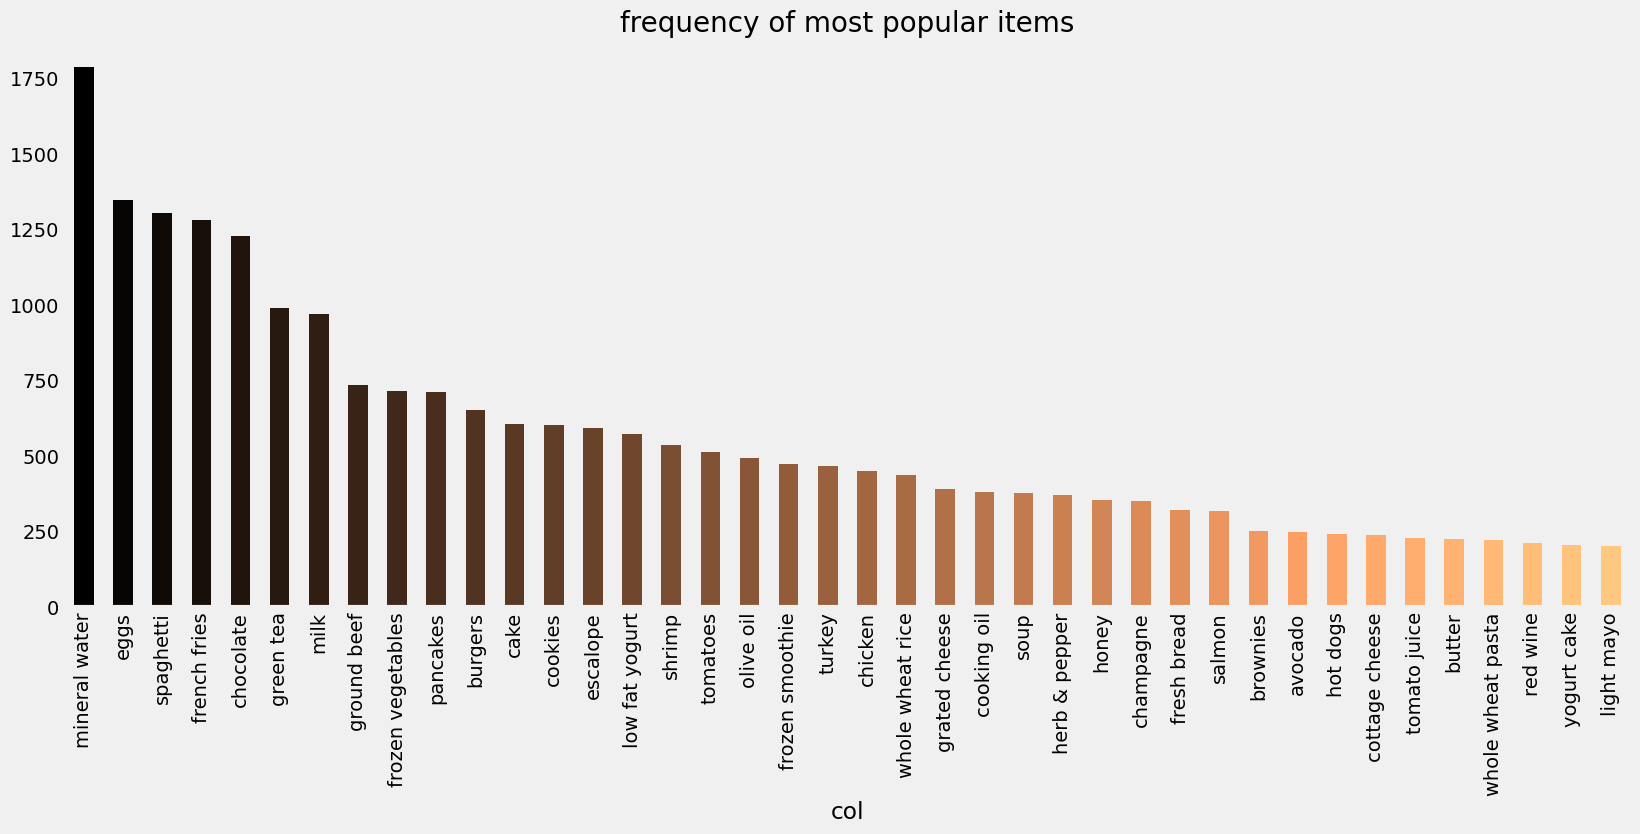

In [85]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
temp_df['col'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

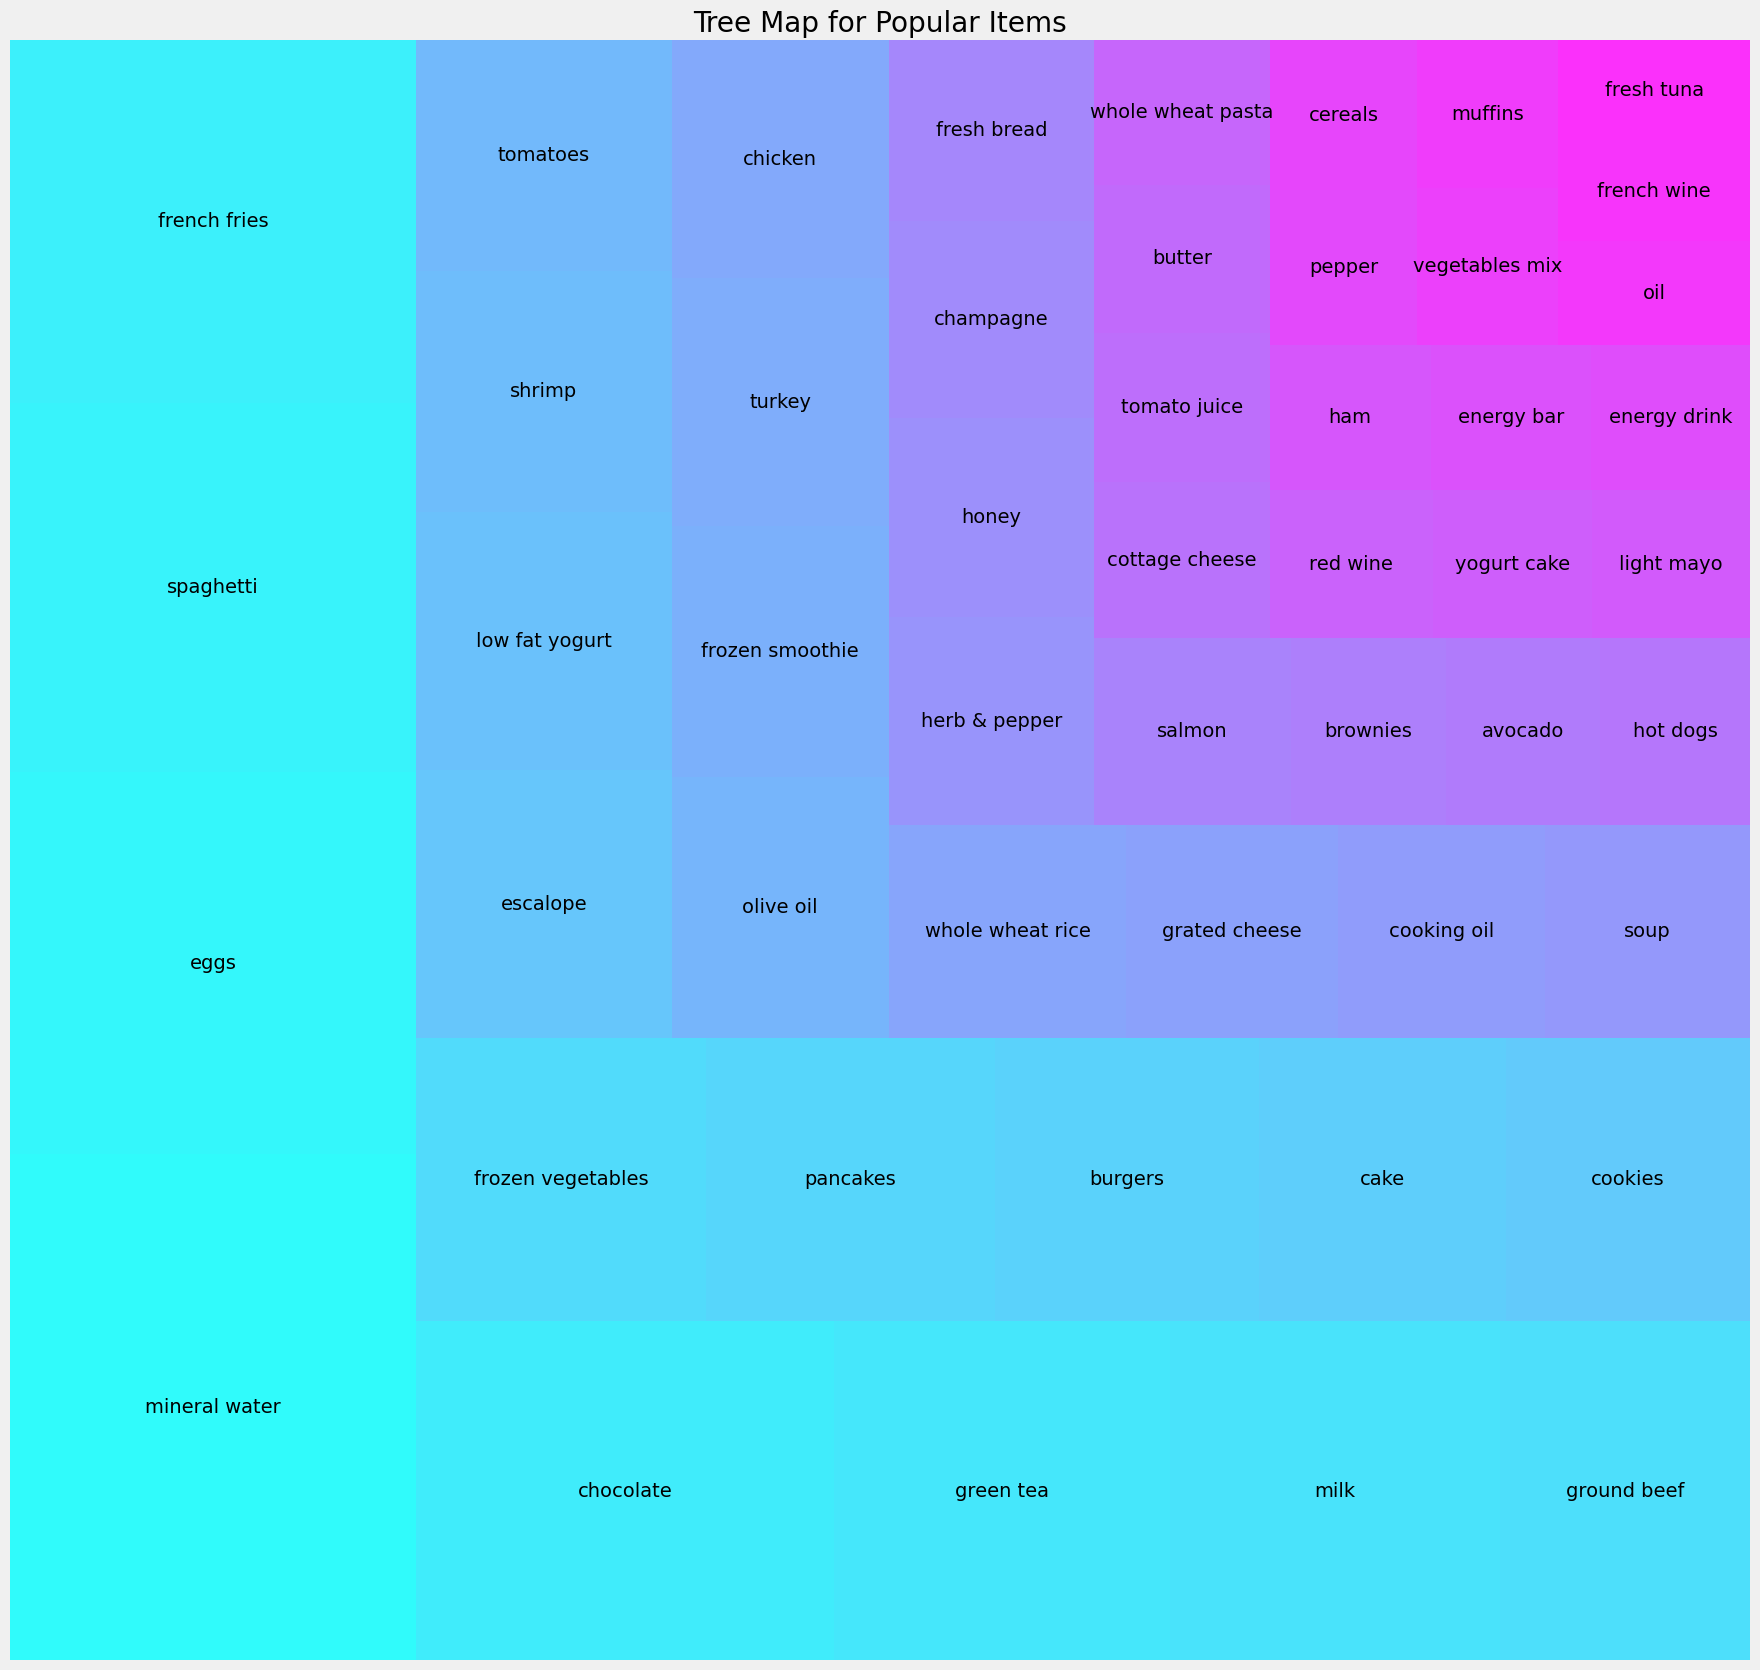

In [86]:
y = temp_df['col'].value_counts().head(50).to_frame()

# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

## Data Preprocessing

In [87]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into a numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


## Using Transaction encoder

In [88]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# To know more about TransactionEncoder go to  http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/

#print(trans)

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape
#print(data)

del data['nan']

# try on the new data below by yourself
new_data = [['Apple', 'Beer', 'Rice', 'Chicken'],
            ['Apple', 'Beer', 'Rice'], 
            ['Apple', 'Beer'], 
            ['Apple', 'Bananas'], 
            ['Milk', 'Beer', 'Rice', 'Chicken'], 
            ['Milk', 'Beer', 'Rice'], 
            ['Milk', 'Beer'], 
            ['Apple', 'Bananas']]
new_trans = []
for i in range(0, 8):
    the_tran = new_data[i]
    the_tran.extend('nan' for j in range(0, 4-len(new_data[i])))
    new_trans.append(the_tran)
new_trans = np.array(new_trans)

t=TransactionEncoder()
new_data=t.fit_transform(new_trans)
new_data=pd.DataFrame(new_data,columns=t.columns_)
    
print(new_data)
del new_data['nan']

   Apple  Bananas   Beer  Chicken   Milk   Rice    nan
0   True    False   True     True  False   True  False
1   True    False   True    False  False   True   True
2   True    False   True    False  False  False   True
3   True     True  False    False  False  False   True
4  False    False   True     True   True   True  False
5  False    False   True    False   True   True   True
6  False    False   True    False   True  False   True
7   True     True  False    False  False  False   True


In [89]:
# getting the head of the data

#del data['nan']


## Applying apriori

<img src="https://blog-c7ff.kxcdn.com/blog/wp-content/uploads/2017/03/Apriori-Algorithm.jpg" width="500px">

## How does Apriori Algorithm Work ?

A key concept in Apriori algorithm is the anti-monotonicity of the support measure. It assumes that

* All subsets of a frequent itemset must be frequent
* Similarly, for any infrequent itemset, all its supersets must be infrequent too

**Step 1**: Create a frequency table of all the items that occur in all the transactions.

**Step 2**: We know that only those elements are significant for which the support is greater than or equal to the threshold support.

**Step 3**: The next step is to make all the possible pairs of the significant items keeping in mind that the order doesn’t matter, i.e., AB is same as BA.

**Step 4**: We will now count the occurrences of each pair in all the transactions.

**Step 5**: Again only those itemsets are significant which cross the support threshold

**Step 6**: Now let’s say we would like to look for a set of three items that are purchased together. We will use the itemsets found in step 5 and create a set of 3 items.

In [90]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 1% support:
apriori(data, min_support = 0.01, use_colnames = True)


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(ground beef, mineral water, milk)"
253,0.017064,"(ground beef, mineral water, spaghetti)"
254,0.015731,"(mineral water, spaghetti, milk)"
255,0.010265,"(spaghetti, mineral water, olive oil)"


The advantage of working with pandas DataFrames is that we can use its convenient features to filter the results. For instance, let's assume we are only interested in itemsets of length 2 that have a support of at least 80 percent. First, we create the frequent itemsets via apriori and add a new column that stores the length of each itemset:

## Selecting and Filtering the Results

In [91]:
frequent_itemsets = apriori(data, min_support = 0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.020397,(almonds),1
1,0.033329,(avocado),1
2,0.010799,(barbecue sauce),1
3,0.014265,(black tea),1
4,0.011465,(body spray),1
...,...,...,...
252,0.011065,"(ground beef, mineral water, milk)",3
253,0.017064,"(ground beef, mineral water, spaghetti)",3
254,0.015731,"(mineral water, spaghetti, milk)",3
255,0.010265,"(spaghetti, mineral water, olive oil)",3


In [92]:
frequent_itemsets = apriori(data, min_support = 0.02, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.020397,(almonds),1
1,0.033329,(avocado),1
2,0.033729,(brownies),1
3,0.087188,(burgers),1
4,0.030129,(butter),1
...,...,...,...
98,0.020131,"(mineral water, whole wheat rice)",2
99,0.022930,"(spaghetti, olive oil)",2
100,0.025197,"(pancakes, spaghetti)",2
101,0.021197,"(shrimp, spaghetti)",2


In [93]:
frequent_itemsets = apriori(data, min_support = 0.03, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.033329,(avocado),1
1,0.033729,(brownies),1
2,0.087188,(burgers),1
3,0.030129,(butter),1
4,0.081056,(cake),1
5,0.046794,(champagne),1
6,0.059992,(chicken),1
7,0.163845,(chocolate),1
8,0.080389,(cookies),1
9,0.051060,(cooking oil),1


In [94]:
frequent_itemsets = apriori(data, min_support = 0.04, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.046794,(champagne),1
3,0.059992,(chicken),1
4,0.163845,(chocolate),1
5,0.080389,(cookies),1
6,0.051060,(cooking oil),1
7,0.179709,(eggs),1
8,0.079323,(escalope),1
9,0.170911,(french fries),1


In [95]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1
5,0.051060,(cooking oil),1
6,0.179709,(eggs),1
7,0.079323,(escalope),1
8,0.170911,(french fries),1
9,0.063325,(frozen smoothie),1


In [96]:
frequent_itemsets = apriori(data, min_support = 0.06, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.163845,(chocolate),1
3,0.080389,(cookies),1
4,0.179709,(eggs),1
5,0.079323,(escalope),1
6,0.170911,(french fries),1
7,0.063325,(frozen smoothie),1
8,0.095321,(frozen vegetables),1
9,0.132116,(green tea),1


In [97]:
frequent_itemsets = apriori(data, min_support = 0.08, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.163845,(chocolate),1
3,0.080389,(cookies),1
4,0.179709,(eggs),1
5,0.170911,(french fries),1
6,0.095321,(frozen vegetables),1
7,0.132116,(green tea),1
8,0.098254,(ground beef),1
9,0.129583,(milk),1


In [98]:
frequent_itemsets = apriori(data, min_support = 0.1, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.163845,(chocolate),1
1,0.179709,(eggs),1
2,0.170911,(french fries),1
3,0.132116,(green tea),1
4,0.129583,(milk),1
5,0.238368,(mineral water),1
6,0.174110,(spaghetti),1


In [99]:
frequent_itemsets = apriori(data, min_support = 0.12, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.163845,(chocolate),1
1,0.179709,(eggs),1
2,0.170911,(french fries),1
3,0.132116,(green tea),1
4,0.129583,(milk),1
5,0.238368,(mineral water),1
6,0.174110,(spaghetti),1


In [100]:
frequent_itemsets = apriori(data, min_support = 0.16, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.163845,(chocolate),1
1,0.179709,(eggs),1
2,0.170911,(french fries),1
3,0.238368,(mineral water),1
4,0.174110,(spaghetti),1


In [101]:
frequent_itemsets = apriori(data, min_support = 0.20, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1


<function matplotlib.pyplot.show(close=None, block=None)>

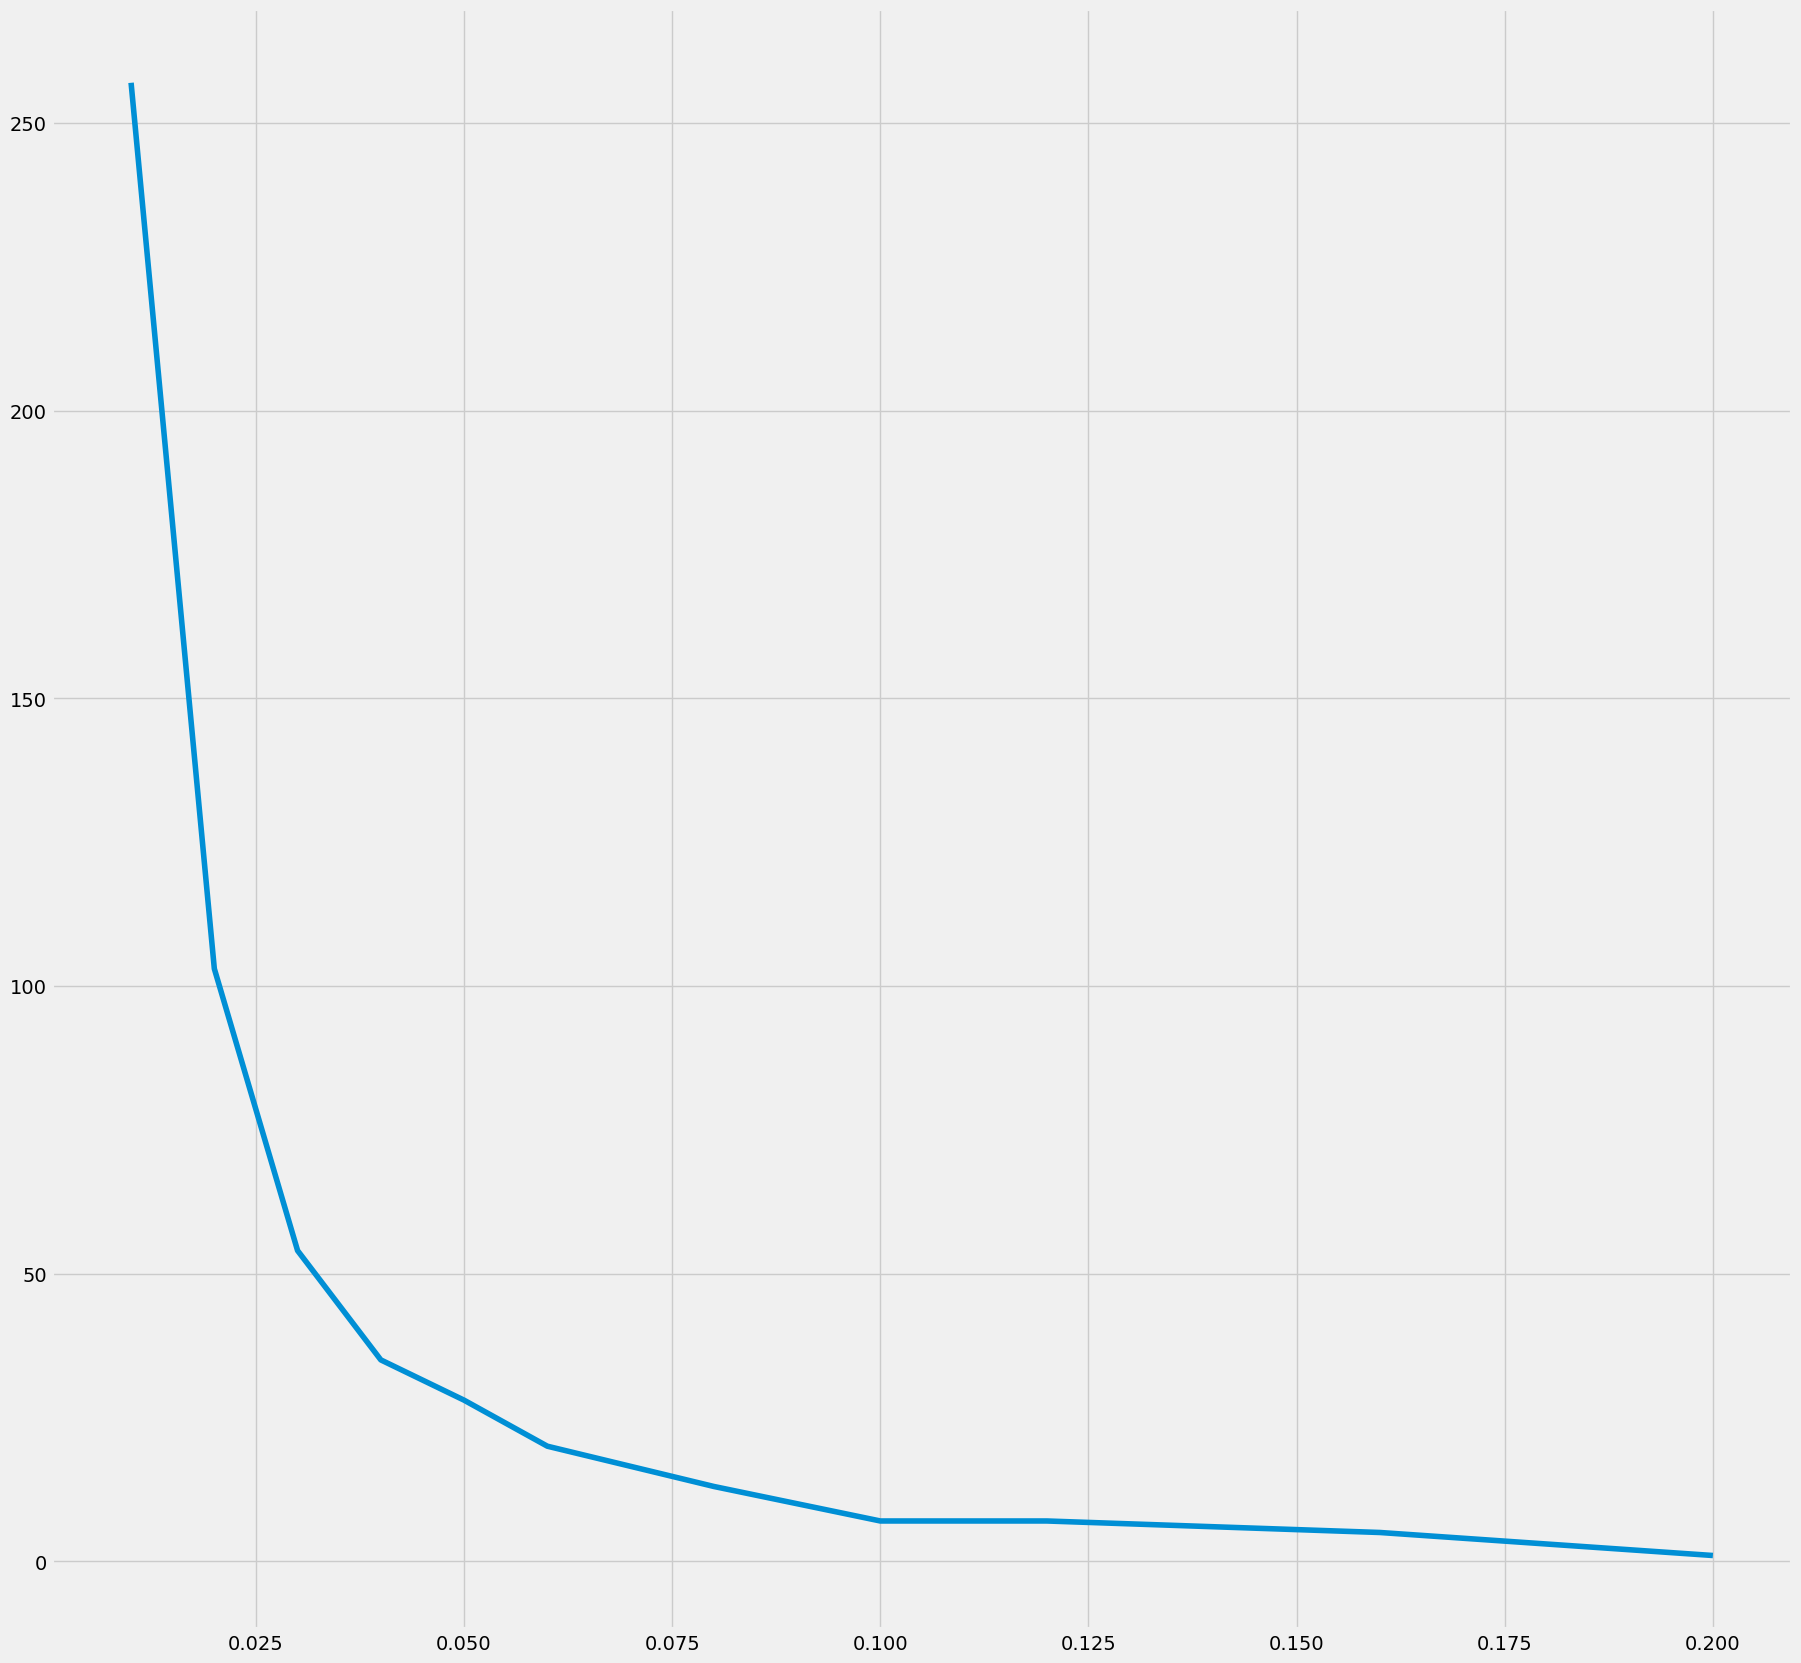

In [102]:
import matplotlib.pyplot as py

support_threshold=[0.01,0.02,0.03,0.04,0.05,0.06,0.08,0.1,0.12,0.16,0.20]
freq_itemsets=[257,103,54,35,28,20,13,7,7,5,1]

py.plot(support_threshold,freq_itemsets)

py.show

In [103]:
# getting th item sets with length = 2 and support more han 1%
support_threhold = 0.01
length = 2

frequent_itemsets = apriori(data, min_support = support_threhold, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ])
print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ].shape)

      support                       itemsets  length
75   0.011598       (avocado, mineral water)       2
76   0.011465                (burgers, cake)       2
77   0.017064           (burgers, chocolate)       2
78   0.028796                (burgers, eggs)       2
79   0.021997        (burgers, french fries)       2
..        ...                            ...     ...
235  0.011199             (tomatoes, shrimp)       2
236  0.014265              (soup, spaghetti)       2
237  0.020931          (tomatoes, spaghetti)       2
238  0.016531            (spaghetti, turkey)       2
239  0.014131  (spaghetti, whole wheat rice)       2

[165 rows x 3 columns]
(165, 3)


In [104]:
# getting th item sets with length = 2 and support more than 2%
support_threhold = 0.02
length = 2

frequent_itemsets = apriori(data, min_support = support_threhold, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ])
print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ].shape)

      support                            itemsets  length
53   0.028796                     (burgers, eggs)       2
54   0.021997             (burgers, french fries)       2
55   0.024397            (burgers, mineral water)       2
56   0.021464                (burgers, spaghetti)       2
57   0.027463               (cake, mineral water)       2
58   0.022797            (mineral water, chicken)       2
59   0.033196                   (chocolate, eggs)       2
60   0.034395           (chocolate, french fries)       2
61   0.022930      (chocolate, frozen vegetables)       2
62   0.023464              (chocolate, green tea)       2
63   0.023064            (chocolate, ground beef)       2
64   0.032129                   (chocolate, milk)       2
65   0.052660          (chocolate, mineral water)       2
66   0.039195              (chocolate, spaghetti)       2
67   0.020131        (cooking oil, mineral water)       2
68   0.036395                (french fries, eggs)       2
69   0.021730 

In [105]:
# getting th item sets with length = 2 and support more han 3%
support_threhold = 0.03
length = 2

frequent_itemsets = apriori(data, min_support = support_threhold, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ])
print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ].shape)

     support                            itemsets  length
36  0.033196                   (chocolate, eggs)       2
37  0.034395           (chocolate, french fries)       2
38  0.032129                   (chocolate, milk)       2
39  0.052660          (chocolate, mineral water)       2
40  0.039195              (chocolate, spaghetti)       2
41  0.036395                (french fries, eggs)       2
42  0.030796                        (eggs, milk)       2
43  0.050927               (mineral water, eggs)       2
44  0.036528                   (eggs, spaghetti)       2
45  0.033729       (french fries, mineral water)       2
46  0.035729  (mineral water, frozen vegetables)       2
47  0.031063          (green tea, mineral water)       2
48  0.040928        (ground beef, mineral water)       2
49  0.039195            (ground beef, spaghetti)       2
50  0.047994               (mineral water, milk)       2
51  0.035462                   (spaghetti, milk)       2
52  0.033729           (pancake

In [106]:
# getting th item sets with length = 2 and support more than 4%
support_threhold = 0.04
length = 2

frequent_itemsets = apriori(data, min_support = support_threhold, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ])
print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ].shape)

     support                      itemsets  length
30  0.052660    (chocolate, mineral water)       2
31  0.050927         (mineral water, eggs)       2
32  0.040928  (ground beef, mineral water)       2
33  0.047994         (mineral water, milk)       2
34  0.059725    (mineral water, spaghetti)       2
(5, 3)


In [107]:
# getting th item sets with length = 2 and support more han 5%
support_threhold = 0.05
length = 2

frequent_itemsets = apriori(data, min_support = support_threhold, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ])
print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ].shape)

     support                    itemsets  length
25  0.052660  (chocolate, mineral water)       2
26  0.050927       (mineral water, eggs)       2
27  0.059725  (mineral water, spaghetti)       2
(3, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

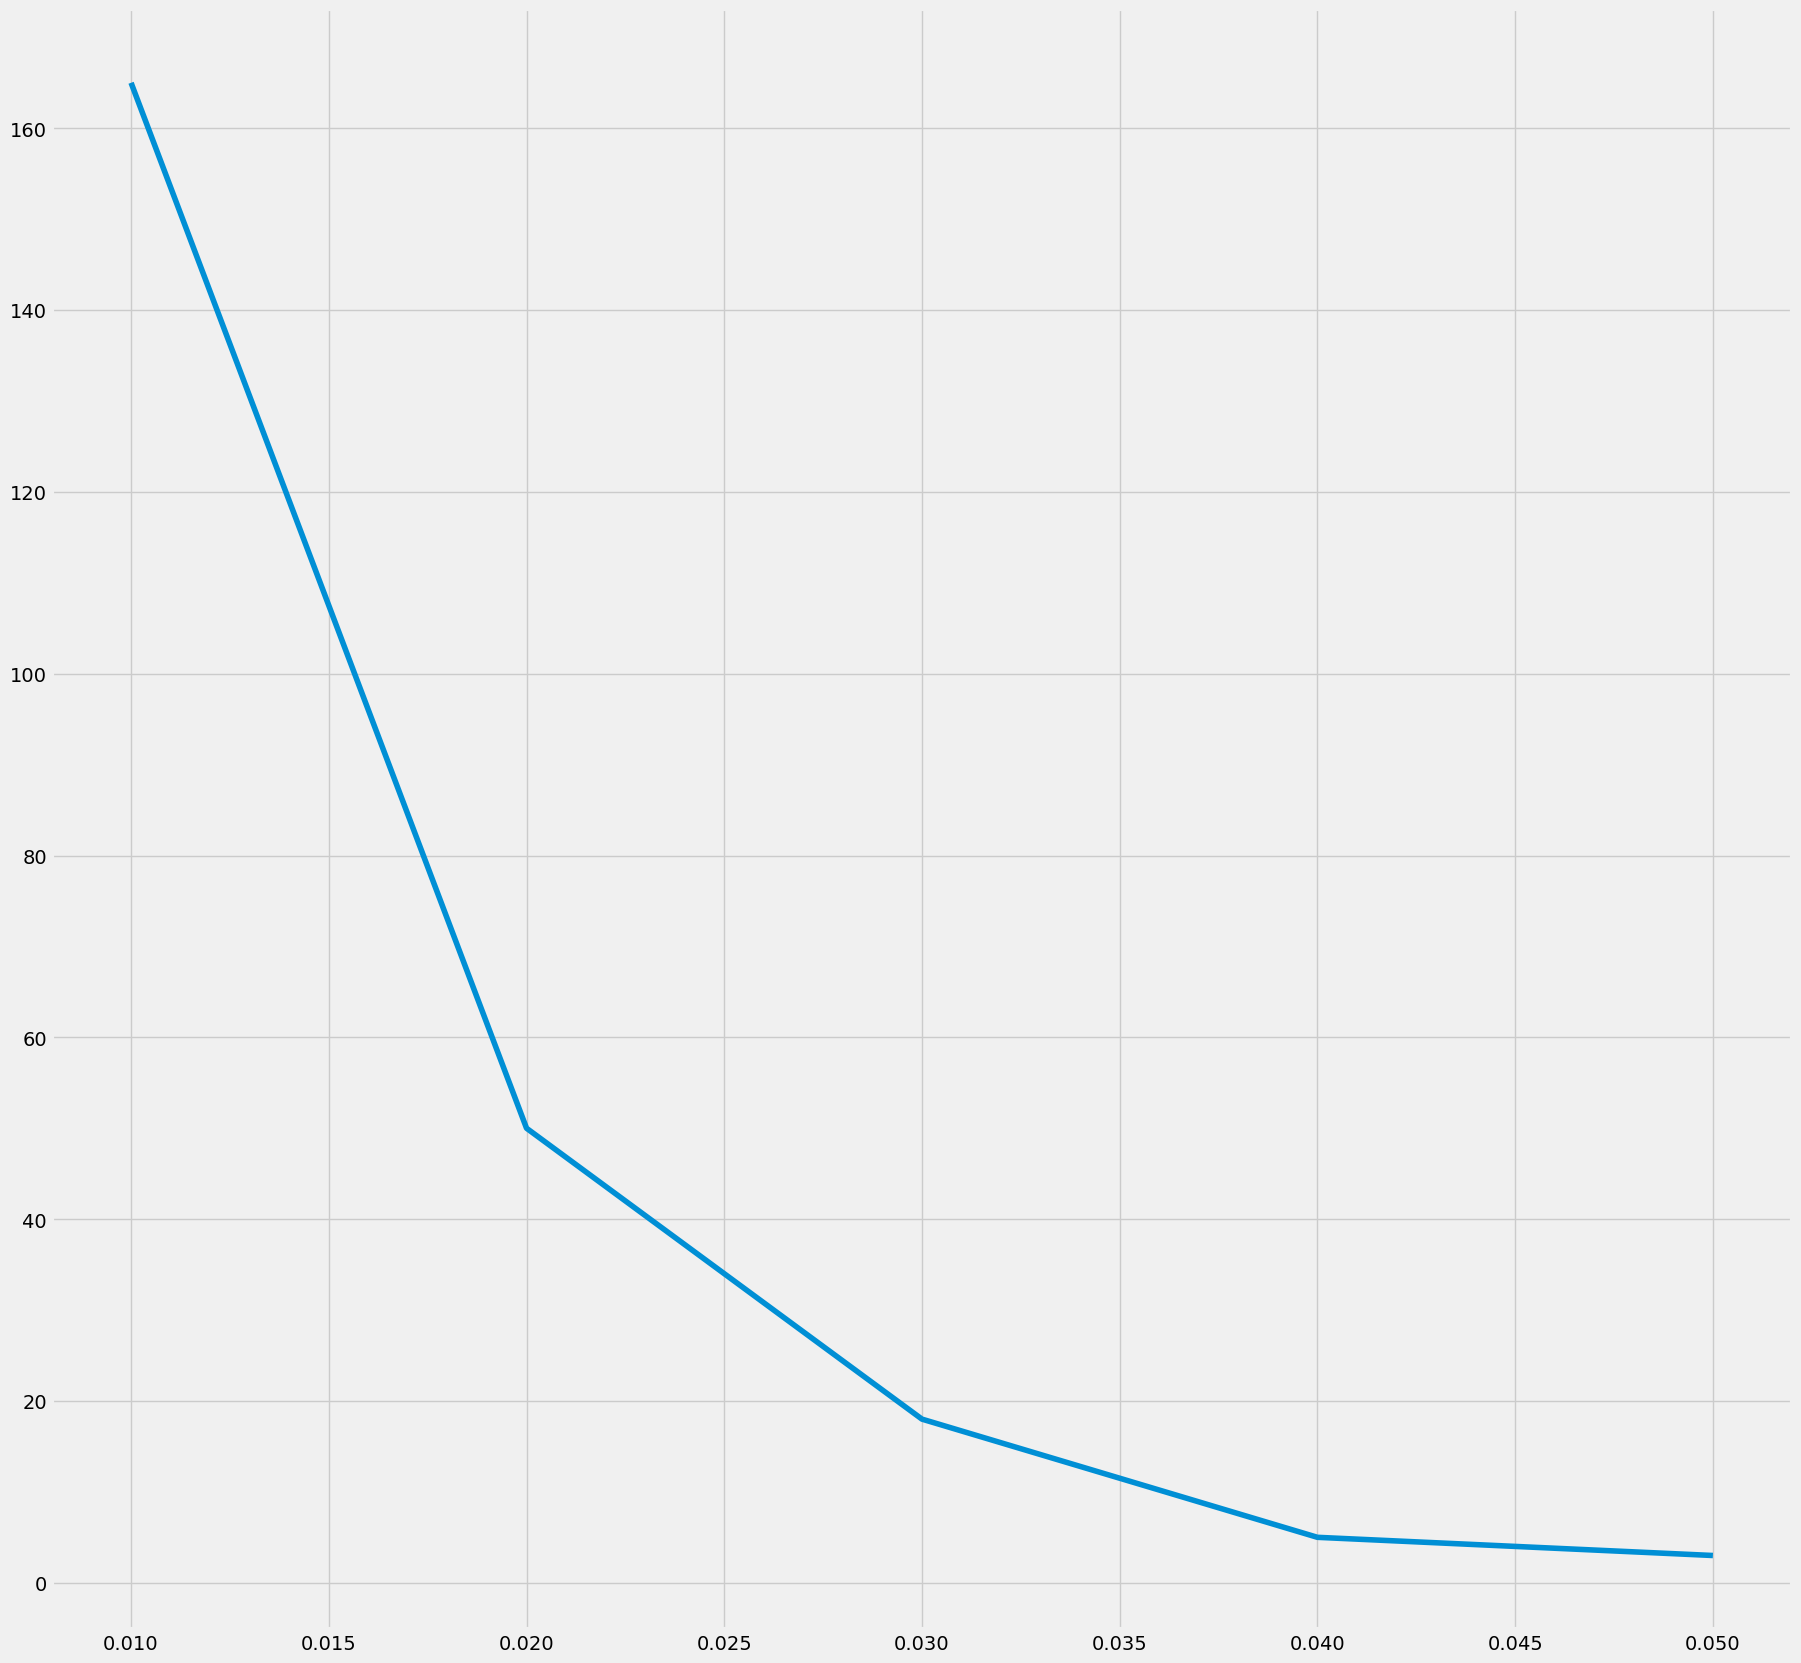

In [109]:
import matplotlib.pyplot as pl

support=[0.01,0.02,0.03,0.04,0.05]
sztwo_freqitemset=[165,50,18,5,3]

pl.plot(support,sztwo_freqitemset)

pl.show

In [ ]:
#

In [110]:
#

## Association Mining

In [111]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'mineral water'}]

,support,itemsets,length
16,0.238368,(mineral water),1


In [112]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'eggs'}]

,support,itemsets,length
6,0.179709,(eggs),1


In [113]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'Spaghetti'}]

,support,itemsets,length


In [114]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'chocolate'}]

,support,itemsets,length
3,0.163845,(chocolate),1


In [115]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'chocolate', 'mineral water'}]

,support,itemsets,length
25,0.05266,"(chocolate, mineral water)",2


In [116]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'eggs', 'mineral water'}]

,support,itemsets,length
26,0.050927,"(mineral water, eggs)",2


This notebook is adaption from the following kaggle notebook https://www.kaggle.com/roshansharma/market-basket-analysis.